# Template
- 1. EDA
- 2. 전처리
- 3. 데이터 분할
- 4. 학습
- 5. hyper-parameter tuning
- 6. 최종 테스트 

## Load Libraries & Data

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import talib

### <Strong>들어가기 앞서</Strong> : <br>코스피는 거시경제학적인 측면에 기반한 지표들에 의해 지수의 등락이 결정된다고 판단하여 다양한 경제 지표들을 가져와서 Feature Engineering을 통하여 feature로 결정하여 사용

### 국내 증시 외 추가 data
 1. 기술적 지표
  - RSI
  - EMA
  - ROC
 2. 국채
  - 미국채 3개월물
  - 미국채 2년물
  - 미국채 10년물
  - 한국채 10년물
 3. 원자재
  - 서부텍사스산 원유(wti)
  - 천연가스
  - 금
  - 은
  - 구리
 4. 환율
  - 달러 인덱스
  - 원/달러
  - 엔/달러
  - 위안/달러
 5. 지수
  - 다우
  - S&p 500
  - 나스닥
  - 항셍 (홍콩)
  - 중국 종합 지수 (심천 + 상해)
  - 상해 지수

## Data 추가

In [370]:
# read train csv
train_path = 'data/train/'
kospi_train = pd.read_csv(train_path + 'kospi_train.csv') # kospi
celltrion_train = pd.read_csv(train_path + 'celltrion_train.csv') # celltrion
kakao_train = pd.read_csv(train_path + 'kakao_train.csv') # kakao
naver_train = pd.read_csv(train_path + 'naver_train.csv') # naver
samsung_train = pd.read_csv(train_path + 'samsung_train.csv') # samsung
skhynix_train = pd.read_csv(train_path + 'skhynix_train.csv') # skhynix
us_3MT_train = pd.read_csv(train_path + 'us_3MT_train.csv') # 미국채 3개월 금리
us_2YT_train  = pd.read_csv(train_path + 'us_2YT_train.csv') # 미국채 2년 금리
us_10YT_train = pd.read_csv(train_path + 'us_10YT_train.csv') # 미국채 10년 금리
kr_10YT_train = pd.read_csv(train_path + 'kr_10YT_train.csv') # 한국채 10년 금리
wti_train = pd.read_csv(train_path + 'wti_train.csv') # wti 유가 선물
gas_train = pd.read_csv(train_path + 'gas_train.csv') # 천연 가스 선물
gold_train = pd.read_csv(train_path + 'gold_train.csv') # 금 선물
silver_train = pd.read_csv(train_path + 'silver_train.csv') # 은 선물
copper_train = pd.read_csv(train_path + 'copper_train.csv') # 구리 선물
usd_index_train = pd.read_csv(train_path + 'usd_index_train.csv') # 달러 지수 선물
usd_krw_train = pd.read_csv(train_path + 'usd_krw_train.csv') # 달러/원화 환율
usd_jpy_train = pd.read_csv(train_path + 'usd_jpy_train.csv') # 달러/엔화 환율
usd_cny_train = pd.read_csv(train_path + 'usd_cny_train.csv') # 달러/위안화 환율
dow_train = pd.read_csv(train_path + 'dow_train.csv') # 다우 존스 지수
snp_train = pd.read_csv(train_path + 'snp_train.csv') # snp 500 지수
nasdaq_train = pd.read_csv(train_path + 'nasdaq_train.csv') # nasdaq 지수
hk_train = pd.read_csv(train_path + 'hk_train.csv') # 항셍 지수
csi_train = pd.read_csv(train_path + 'csi_train.csv') # csi300 지수
sanghai_train = pd.read_csv(train_path + 'sanghai_train.csv') # sanghai300 지수

In [371]:
# read test csv
test_path = 'data/test/'
kospi_test = pd.read_csv(test_path + 'kospi_test.csv') # kospi
celltrion_test = pd.read_csv(test_path + 'celltrion_test.csv') # celltrion
kakao_test = pd.read_csv(test_path + 'kakao_test.csv') # kakao
naver_test = pd.read_csv(test_path + 'naver_test.csv') # naver
samsung_test = pd.read_csv(test_path + 'samsung_test.csv') # samsung
skhynix_test = pd.read_csv(test_path + 'skhynix_test.csv') # skhynix
us_3MT_test = pd.read_csv(test_path + 'us_3MT_test.csv') # 미국채 3개월 금리
us_2YT_test  = pd.read_csv(test_path + 'us_2YT_test.csv') # 미국채 2년 금리
us_10YT_test = pd.read_csv(test_path + 'us_10YT_test.csv') # 미국채 10년 금리
kr_10YT_test = pd.read_csv(test_path + 'kr_10YT_test.csv') # 한국채 10년 금리
wti_test = pd.read_csv(test_path + 'wti_test.csv') # wti 유가 선물
gas_test = pd.read_csv(test_path + 'gas_test.csv') # 천연 가스 선물
gold_test = pd.read_csv(test_path + 'gold_test.csv') # 금 선물
silver_test = pd.read_csv(test_path + 'silver_test.csv') # 은 선물
copper_test = pd.read_csv(test_path + 'copper_test.csv') # 구리 선물
usd_index_test = pd.read_csv(test_path + 'usd_index_test.csv') # 달러 지수 선물
usd_krw_test = pd.read_csv(test_path + 'usd_krw_test.csv') # 달러/원화 환율
usd_jpy_test = pd.read_csv(test_path + 'usd_jpy_test.csv') # 달러/엔화 환율
usd_cny_test = pd.read_csv(test_path + 'usd_cny_test.csv') # 달러/위안화 환율
dow_test = pd.read_csv(test_path + 'dow_test.csv') # 다우 존스 지수
snp_test = pd.read_csv(test_path + 'snp_test.csv') # snp 500 지수
nasdaq_test = pd.read_csv(test_path + 'nasdaq_test.csv') # nasdaq 지수
hk_test = pd.read_csv(test_path + 'hk_test.csv') # 항셍 지수
csi_test = pd.read_csv(test_path + 'csi_test.csv') # csi300 지수
sanghai_test = pd.read_csv(test_path + 'sanghai_test.csv') # sanghai300 지수

In [372]:
# 추가 보조지표 생성
kospi_train_ema = talib.EMA(kospi_train.Close, timeperiod=5)
kospi_test_ema = talib.EMA(kospi_test.Close, timeperiod=5)
kospi_train_rsi = talib.RSI(kospi_train.Close, timeperiod=5)
kospi_test_rsi = talib.RSI(kospi_test.Close, timeperiod=5)
kospi_train_roc = talib.ROC(kospi_train.Close, timeperiod=5)
kospi_test_roc = talib.ROC(kospi_test.Close, timeperiod=5)
kospi_train['Ema'] = kospi_train_ema
kospi_test['Ema'] = kospi_test_ema
kospi_train['Rsi'] = kospi_train_rsi
kospi_test['Rsi'] = kospi_test_rsi
kospi_train['Roc'] = kospi_train_roc
kospi_test['Roc'] = kospi_test_roc


### 예측을 위해 Target Value index 조정
- Target Value로 지정할 Close column은 하루 뒤 예측을 위해 Close column만 하루씩 앞당겨 train data에 학습

In [373]:
# target value date adjust
for i in range(len(kospi_train.Close)-1):
    kospi_train.Close[i] = kospi_train.Close[i+1]
kospi_train.drop(kospi_train[-1:].index,inplace=True)

# for i in range(len(kospi_test.Close)-1):
#     kospi_test.Close[i] = kospi_test.Close[i+1]
# kospi_test.drop(kospi_test[-1:].index,inplace=True)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/4137830753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_train.Close[i] = kospi_train.Close[i+1]


In [374]:
# 지표 Null 값의 row 제거
kospi_train = kospi_train[5:]
kospi_test = kospi_test[5:]

### 시계열 데이터 index를 Datetime 형으로 변환 후 입력

In [375]:
# change type of 'Date' to 'datetime'
kospi_train.Date = pd.to_datetime(kospi_train.Date)
celltrion_train.Date = pd.to_datetime(celltrion_train.Date)
kakao_train.Date = pd.to_datetime(kakao_train.Date)
naver_train.Date = pd.to_datetime(naver_train.Date)
samsung_train.Date = pd.to_datetime(samsung_train.Date)
skhynix_train.Date = pd.to_datetime(skhynix_train.Date)
us_3MT_train.Date = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .Date = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.Date = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.Date = pd.to_datetime(kr_10YT_train.Date)
wti_train.Date = pd.to_datetime(wti_train.Date)
gas_train.Date = pd.to_datetime(gas_train.Date)
gold_train.Date = pd.to_datetime(gold_train.Date)
silver_train.Date = pd.to_datetime(silver_train.Date)
copper_train.Date = pd.to_datetime(copper_train.Date)
usd_index_train.Date = pd.to_datetime(usd_index_train.Date)
usd_krw_train.Date = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.Date = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.Date = pd.to_datetime(usd_cny_train.Date)
dow_train.Date = pd.to_datetime(dow_train.Date)
snp_train.Date = pd.to_datetime(snp_train.Date)
nasdaq_train.Date = pd.to_datetime(nasdaq_train.Date)
hk_train.Date = pd.to_datetime(hk_train.Date)
csi_train.Date = pd.to_datetime(csi_train.Date)
sanghai_train.Date = pd.to_datetime(sanghai_train.Date)
kospi_test.Date = pd.to_datetime(kospi_test.Date)
celltrion_test.Date = pd.to_datetime(celltrion_test.Date)
kakao_test.Date = pd.to_datetime(kakao_test.Date)
naver_test.Date = pd.to_datetime(naver_test.Date)
samsung_test.Date = pd.to_datetime(samsung_test.Date)
skhynix_test.Date = pd.to_datetime(skhynix_test.Date)
us_3MT_test.Date = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .Date = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.Date = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.Date = pd.to_datetime(kr_10YT_test.Date)
wti_test.Date = pd.to_datetime(wti_test.Date)
gas_test.Date = pd.to_datetime(gas_test.Date)
gold_test.Date = pd.to_datetime(gold_test.Date)
silver_test.Date = pd.to_datetime(silver_test.Date)
copper_test.Date = pd.to_datetime(copper_test.Date)
usd_index_test.Date = pd.to_datetime(usd_index_test.Date)
usd_krw_test.Date = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.Date = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.Date = pd.to_datetime(usd_cny_test.Date)
dow_test.Date = pd.to_datetime(dow_test.Date)
snp_test.Date = pd.to_datetime(snp_test.Date)
nasdaq_test.Date = pd.to_datetime(nasdaq_test.Date)
hk_test.Date = pd.to_datetime(hk_test.Date)
csi_test.Date = pd.to_datetime(csi_test.Date)
sanghai_test.Date = pd.to_datetime(sanghai_test.Date)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/623898177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_train.Date = pd.to_datetime(kospi_train.Date)


In [376]:
# index adjust
kospi_train.index = pd.to_datetime(kospi_train.Date)
celltrion_train.index = pd.to_datetime(celltrion_train.Date)
kakao_train.index = pd.to_datetime(kakao_train.Date)
naver_train.index = pd.to_datetime(naver_train.Date)
samsung_train.index = pd.to_datetime(samsung_train.Date)
skhynix_train.index = pd.to_datetime(skhynix_train.Date)
us_3MT_train.index = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .index = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.index = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.index = pd.to_datetime(kr_10YT_train.Date)
wti_train.index = pd.to_datetime(wti_train.Date)
gas_train.index = pd.to_datetime(gas_train.Date)
gold_train.index = pd.to_datetime(gold_train.Date)
silver_train.index = pd.to_datetime(silver_train.Date)
copper_train.index = pd.to_datetime(copper_train.Date)
usd_index_train.index = pd.to_datetime(usd_index_train.Date)
usd_krw_train.index = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.index = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.index = pd.to_datetime(usd_cny_train.Date)
dow_train.index = pd.to_datetime(dow_train.Date)
snp_train.index = pd.to_datetime(snp_train.Date)
nasdaq_train.index = pd.to_datetime(nasdaq_train.Date)
hk_train.index = pd.to_datetime(hk_train.Date)
csi_train.index = pd.to_datetime(csi_train.Date)
sanghai_train.index = pd.to_datetime(sanghai_train.Date)
kospi_test.index = pd.to_datetime(kospi_test.Date)
celltrion_test.index = pd.to_datetime(celltrion_test.Date)
kakao_test.index = pd.to_datetime(kakao_test.Date)
naver_test.index = pd.to_datetime(naver_test.Date)
samsung_test.index = pd.to_datetime(samsung_test.Date)
skhynix_test.index = pd.to_datetime(skhynix_test.Date)
us_3MT_test.index = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .index = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.index = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.index = pd.to_datetime(kr_10YT_test.Date)
wti_test.index = pd.to_datetime(wti_test.Date)
gas_test.index = pd.to_datetime(gas_test.Date)
gold_test.index = pd.to_datetime(gold_test.Date)
silver_test.index = pd.to_datetime(silver_test.Date)
copper_test.index = pd.to_datetime(copper_test.Date)
usd_index_test.index = pd.to_datetime(usd_index_test.Date)
usd_krw_test.index = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.index = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.index = pd.to_datetime(usd_cny_test.Date)
dow_test.index = pd.to_datetime(dow_test.Date)
snp_test.index = pd.to_datetime(snp_test.Date)
nasdaq_test.index = pd.to_datetime(nasdaq_test.Date)
hk_test.index = pd.to_datetime(hk_test.Date)
csi_test.index = pd.to_datetime(csi_test.Date)
sanghai_test.index = pd.to_datetime(sanghai_test.Date)

In [377]:
# drop 'Date' column
kospi_train = kospi_train.drop(columns='Date')
celltrion_train = celltrion_train.drop(columns='Date')
kakao_train = kakao_train.drop(columns='Date')
naver_train = naver_train.drop(columns='Date')
samsung_train = samsung_train.drop(columns='Date')
skhynix_train = skhynix_train.drop(columns='Date')
us_3MT_train = us_3MT_train.drop(columns='Date')
us_2YT_train  = us_2YT_train .drop(columns='Date')
us_10YT_train = us_10YT_train.drop(columns='Date')
kr_10YT_train = kr_10YT_train.drop(columns='Date')
wti_train = wti_train.drop(columns='Date')
gas_train = gas_train.drop(columns='Date')
gold_train = gold_train.drop(columns='Date')
silver_train = silver_train.drop(columns='Date')
copper_train = copper_train.drop(columns='Date')
usd_index_train = usd_index_train.drop(columns='Date')
usd_krw_train = usd_krw_train.drop(columns='Date')
usd_jpy_train = usd_jpy_train.drop(columns='Date')
usd_cny_train = usd_cny_train.drop(columns='Date')
dow_train = dow_train.drop(columns='Date')
snp_train = snp_train.drop(columns='Date')
nasdaq_train = nasdaq_train.drop(columns='Date')
hk_train = hk_train.drop(columns='Date')
csi_train = csi_train.drop(columns='Date')
sanghai_train = sanghai_train.drop(columns='Date')
kospi_test = kospi_test.drop(columns='Date')
celltrion_test = celltrion_test.drop(columns='Date')
kakao_test = kakao_test.drop(columns='Date')
naver_test = naver_test.drop(columns='Date')
samsung_test = samsung_test.drop(columns='Date')
skhynix_test = skhynix_test.drop(columns='Date')
us_3MT_test = us_3MT_test.drop(columns='Date')
us_2YT_test  = us_2YT_test .drop(columns='Date')
us_10YT_test = us_10YT_test.drop(columns='Date')
kr_10YT_test = kr_10YT_test.drop(columns='Date')
wti_test = wti_test.drop(columns='Date')
gas_test = gas_test.drop(columns='Date')
gold_test = gold_test.drop(columns='Date')
silver_test = silver_test.drop(columns='Date')
copper_test = copper_test.drop(columns='Date')
usd_index_test = usd_index_test.drop(columns='Date')
usd_krw_test = usd_krw_test.drop(columns='Date')
usd_jpy_test = usd_jpy_test.drop(columns='Date')
usd_cny_test = usd_cny_test.drop(columns='Date')
dow_test = dow_test.drop(columns='Date')
snp_test = snp_test.drop(columns='Date')
nasdaq_test = nasdaq_test.drop(columns='Date')
hk_test = hk_test.drop(columns='Date')
csi_test = csi_test.drop(columns='Date')
sanghai_test = sanghai_test.drop(columns='Date')

### 각 데이터 파트 별 차트의 시각화

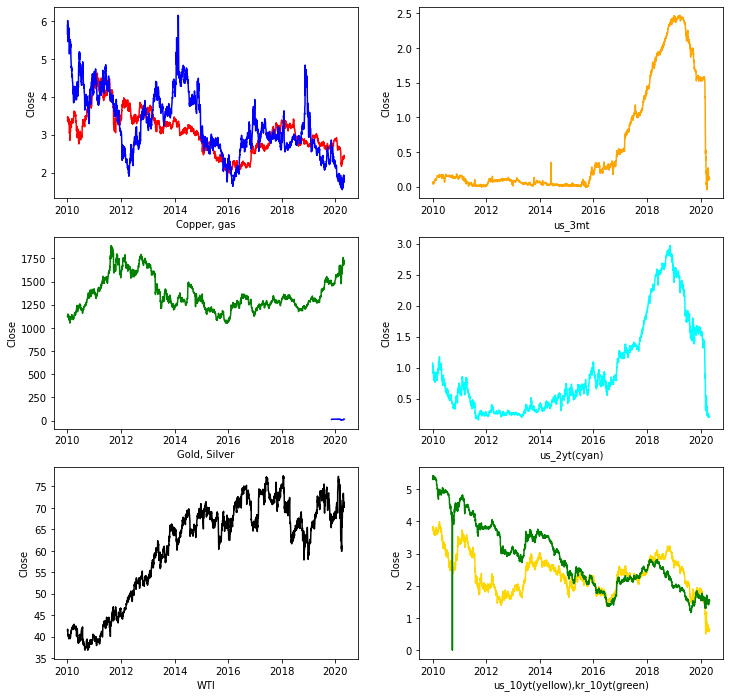

In [378]:
# 원자재 및 국채 금리 시각화
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.lineplot(x=copper_train.index,y = copper_train['Close'], color='r')
sns.lineplot(x=gas_train.index,y = gas_train['Close'], color = 'b')
plt.xlabel('Copper, gas')
plt.subplot(323)
sns.lineplot(x=gold_train.index ,y = gold_train['Close'], color = 'g')
sns.lineplot(x=silver_train.index ,y = silver_train['Close'], color = 'b')
plt.xlabel('Gold, Silver')
plt.subplot(325)
sns.lineplot(x=wti_train.index,y = wti_train['Close'], color = 'black')
plt.xlabel('WTI')
plt.subplot(322)
sns.lineplot(x=us_3MT_train.index,y = us_3MT_train['Close'], color = 'orange')
plt.xlabel('us_3mt')
plt.subplot(324)
sns.lineplot(x=us_2YT_train.index,y = us_2YT_train['Close'], color = 'cyan')
plt.xlabel('us_2yt(cyan)')
plt.subplot(326)
sns.lineplot(x=us_10YT_train.index,y = us_10YT_train['Close'], color = 'gold')
sns.lineplot(x=kr_10YT_train.index,y = kr_10YT_train['Close'], color = 'green')
plt.xlabel('us_10yt(yellow),kr_10yt(green)')
plt.show()

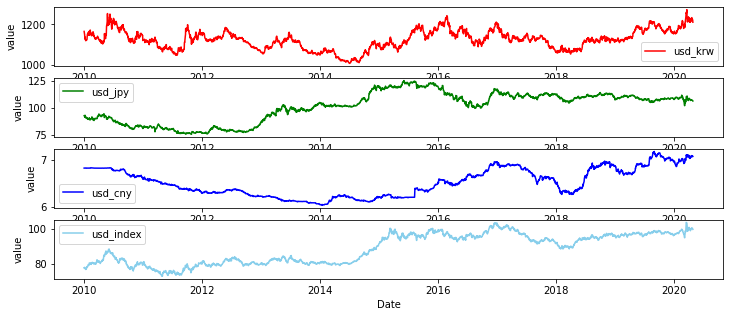

In [379]:
# 환율 (달러-원화/달러-엔화/달러-위안화/달러인덱스) 시각화
plt.figure(figsize=(12,5))
plt.subplot(411)
plt.ylabel('value')
sns.lineplot(x=usd_krw_train.index,y = usd_krw_train['Close'], color='r',label='usd_krw')
plt.subplot(412)
plt.ylabel('value')
sns.lineplot(x=usd_jpy_train.index,y = usd_jpy_train['Close'], color = 'g',label='usd_jpy')
plt.subplot(413)
plt.ylabel('value')
sns.lineplot(x=usd_cny_train.index,y = usd_cny_train['Close'], color = 'b',label='usd_cny')
plt.subplot(414)
plt.ylabel('value')
sns.lineplot(x=usd_index_train.index,y = usd_index_train['Close'], color = 'skyblue',label='usd_index')
plt.show()

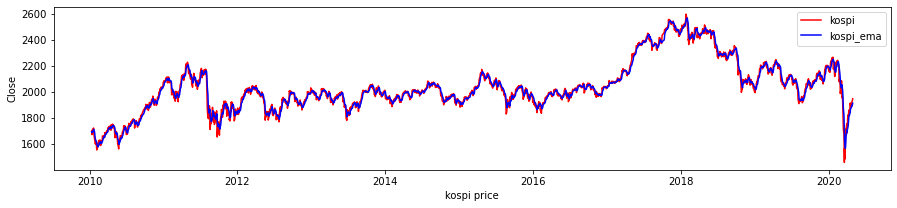

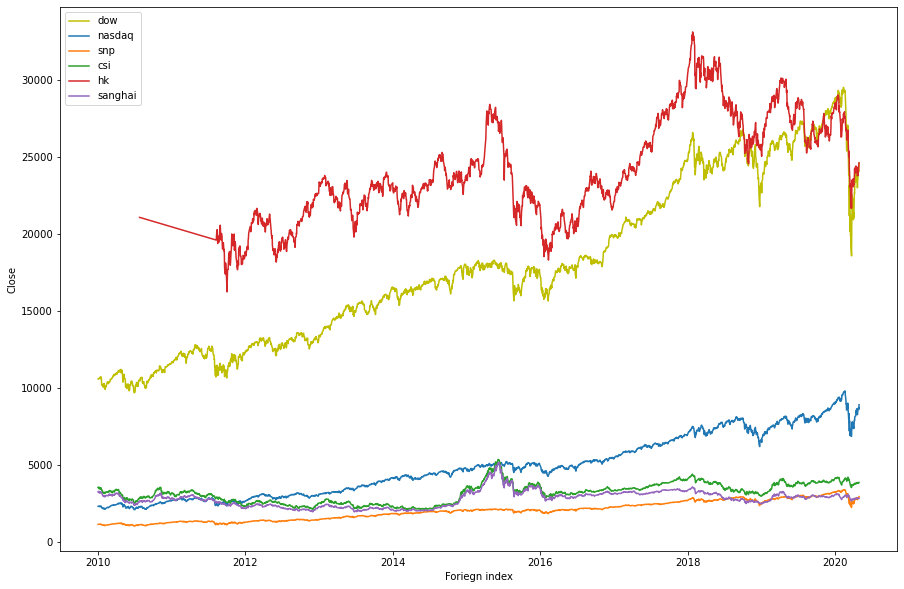

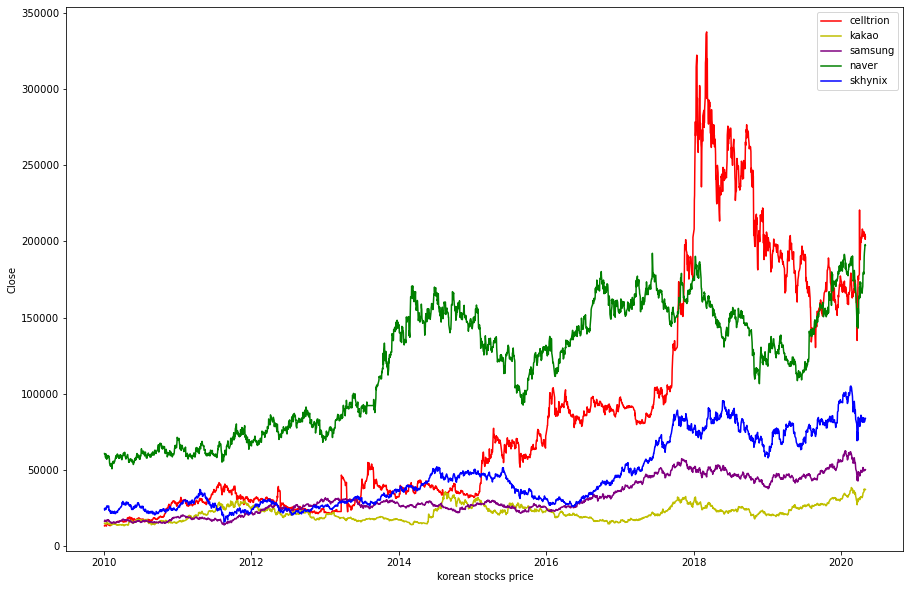

In [380]:
# 국내/해외 지수 및 기업 주가 시각화
plt.figure(figsize=(15,3))
plt.xlabel('kospi price')
sns.lineplot(x = kospi_train.index, y = kospi_train['Close'], color= 'r', label='kospi')
sns.lineplot(x = kospi_train.index, y = kospi_train['Ema'], color= 'b', label='kospi_ema')
plt.show()
plt.figure(figsize=(15,10))
plt.xlabel('Foriegn index')
sns.lineplot(x = dow_train.index, y = dow_train['Close'], color = 'y',label='dow')
sns.lineplot(x = nasdaq_train.index, y = nasdaq_train['Close'], label='nasdaq')
sns.lineplot(x = snp_train.index, y = snp_train['Close'], label='snp')
sns.lineplot(x = csi_train.index, y = csi_train['Close'], label='csi')
sns.lineplot(x = hk_train.index, y = hk_train['Close'], label='hk')
sns.lineplot(x = sanghai_train.index, y = sanghai_train['Close'], label='sanghai')
plt.show()
plt.figure(figsize=(15,10))
plt.xlabel('korean stocks price')
sns.lineplot(x = celltrion_train.index, y = celltrion_train['Close'],color='r', label='celltrion')
sns.lineplot(x = kakao_train.index, y = kakao_train['Close'], color='y', label='kakao')
sns.lineplot(x = samsung_train.index, y = samsung_train['Close'],color='purple', label='samsung')
sns.lineplot(x = naver_train.index, y = naver_train['Close'], color='g', label='naver')
sns.lineplot(x = skhynix_train.index, y = skhynix_train['Close'],color='b', label='skhynix')
plt.show()

### 코스피를 기준으로 모든 데이터를 merge 후 상관관계 확인

In [381]:
# kospi_train merge
kospi_train_merged = pd.merge(kospi_train['Close'],kospi_train.Rsi,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kospi_train.Ema,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kospi_train.Roc,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,dow_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,snp_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,samsung_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kakao_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,skhynix_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,csi_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,sanghai_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_krw_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_index_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_cny_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_jpy_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gold_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,wti_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,copper_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gas_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kr_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_3MT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged.columns = ['Target','Rsi','Ema','Roc','Dow','Snp','Samsung','Kakao','Naver','Skhynix','Celltrion','Csi','Sanghai','Usd_krw','Usd_index','Usd_cny','Usd_jpy','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1943280060.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,samsung_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1943280060.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1943280060.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.

In [382]:
# merge 확인
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543 entries, 2010-01-11 to 2020-04-28
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2543 non-null   float64
 1   Rsi        2543 non-null   float64
 2   Ema        2543 non-null   float64
 3   Roc        2543 non-null   float64
 4   Dow        2465 non-null   float64
 5   Snp        2465 non-null   float64
 6   Samsung    2542 non-null   float64
 7   Kakao      2542 non-null   float64
 8   Naver      2542 non-null   float64
 9   Skhynix    2542 non-null   float64
 10  Celltrion  2542 non-null   float64
 11  Csi        2421 non-null   float64
 12  Sanghai    2421 non-null   float64
 13  Usd_krw    2543 non-null   float64
 14  Usd_index  2526 non-null   float64
 15  Usd_cny    2543 non-null   float64
 16  Usd_jpy    2543 non-null   float64
 17  Gold       2414 non-null   float64
 18  Wti        2465 non-null   float64
 19  Copper     2403 non-null   flo

<AxesSubplot:>

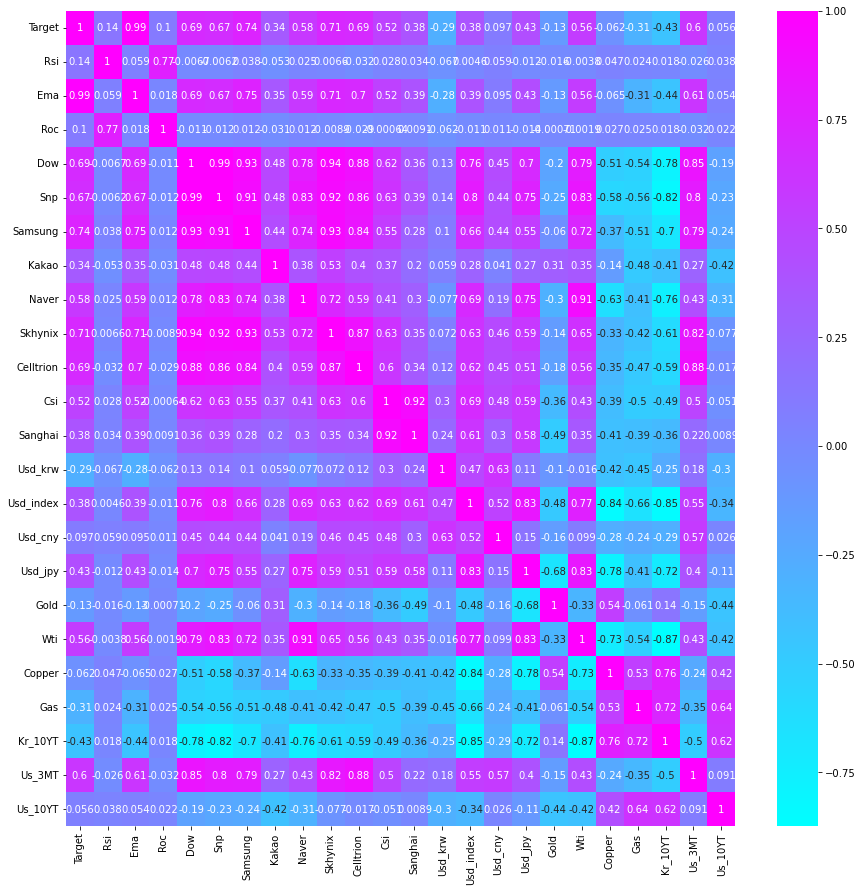

In [383]:
# Showing correlation of data
plt.figure(figsize=(15,15))
sns.heatmap(kospi_train_merged.corr(),annot=True, cmap='cool')

## EDA
### 각 지표 별 코스피와 관계 분석
 1. 기술적 지표는 모두 이용
 2. 국내 증시 : 국내 주식 중 kakao를 제외한 대부분의 주식들이 kospi와 상관계수가 높다.
  - 국내 증시는 다중 공선성 때문에 상관계수가 가장 높은 삼성과 상관계수가 상대적으로 낮은 kakao를 사용
 3. 국제 증시 지수 : 미국 증시(Dow/S&p 500), 중국 증시(Csi), 항셍 지수(Hk)와 kospi는 상관계수가 높다.
  - 미국 증시는 Dow만 사용하며 feature engineering에 유의하여 진행(다중 공선성 주의)하며 중국 증시(Csi)와 같이 사용
  - 항셍 지수는 코스피와 상관계수가 높으나 Null값이 481개로 사용하지 않음
 4. 원자재 : 금을 제외한 모든 원자재가 주가와 지수 간 양/음의 상관관계를 나타내고 있어 금을 제외한 모든 데이터를 사용
 5. 환율 : 원/달러의 음의 상관관계와 달러 인덱스의 상관 관계를 참고하여 사용
  - 원화 가치가 절하되었을 때 주가가 오를 확률이 높다는 가정을 하고 사용(달러 인덱스가 높으면 원화 가치가 낮을 확률이 높음)
 6. 국채 수익률: 미국채 3개월물과 한국채 10년물이 절대값으로 높은 상관관계를 가지고 있어 사용 
 7. 기타 : 한국 국채 수익률 및 달러/원화 환율이 낮을 수록 코스피가 높아지는 경향을 볼 수가 있음

##### Feature engineering에 사용될 column : <br> <Strong> Samsung, Kakao, Dow, Csi, Wti, Gas, Copper, Usd_krw, Usd_index, Us_3MT, kr_10YT </Strong>

In [384]:
# 사용하지 않는 coulmn 제거
kospi_train_merged = kospi_train_merged.drop(columns=['Snp','Naver', 'Skhynix', 'Celltrion', 'Sanghai', 'Usd_cny', 'Usd_jpy', 'Gold', 'Us_10YT'])

# 데이터 전처리
## 결측치 처리
 - 지표는 일정 기간 동안의 방향성을 가지고 있기 때문에 결측치의 전값과 다음값의 평균값을 입력하여 채움

In [385]:
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543 entries, 2010-01-11 to 2020-04-28
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2543 non-null   float64
 1   Rsi        2543 non-null   float64
 2   Ema        2543 non-null   float64
 3   Roc        2543 non-null   float64
 4   Dow        2465 non-null   float64
 5   Samsung    2542 non-null   float64
 6   Kakao      2542 non-null   float64
 7   Csi        2421 non-null   float64
 8   Usd_krw    2543 non-null   float64
 9   Usd_index  2526 non-null   float64
 10  Wti        2465 non-null   float64
 11  Copper     2403 non-null   float64
 12  Gas        2463 non-null   float64
 13  Kr_10YT    2542 non-null   float64
 14  Us_3MT     2525 non-null   float64
dtypes: float64(15)
memory usage: 382.4 KB


In [386]:
# 최근의 앞 뒤의 행의 값의 평균을 대입
kospi_train_merged = kospi_train_merged.fillna(kospi_train_merged.interpolate())
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543 entries, 2010-01-11 to 2020-04-28
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2543 non-null   float64
 1   Rsi        2543 non-null   float64
 2   Ema        2543 non-null   float64
 3   Roc        2543 non-null   float64
 4   Dow        2543 non-null   float64
 5   Samsung    2543 non-null   float64
 6   Kakao      2543 non-null   float64
 7   Csi        2543 non-null   float64
 8   Usd_krw    2543 non-null   float64
 9   Usd_index  2543 non-null   float64
 10  Wti        2543 non-null   float64
 11  Copper     2543 non-null   float64
 12  Gas        2543 non-null   float64
 13  Kr_10YT    2543 non-null   float64
 14  Us_3MT     2543 non-null   float64
dtypes: float64(15)
memory usage: 382.4 KB


<AxesSubplot:>

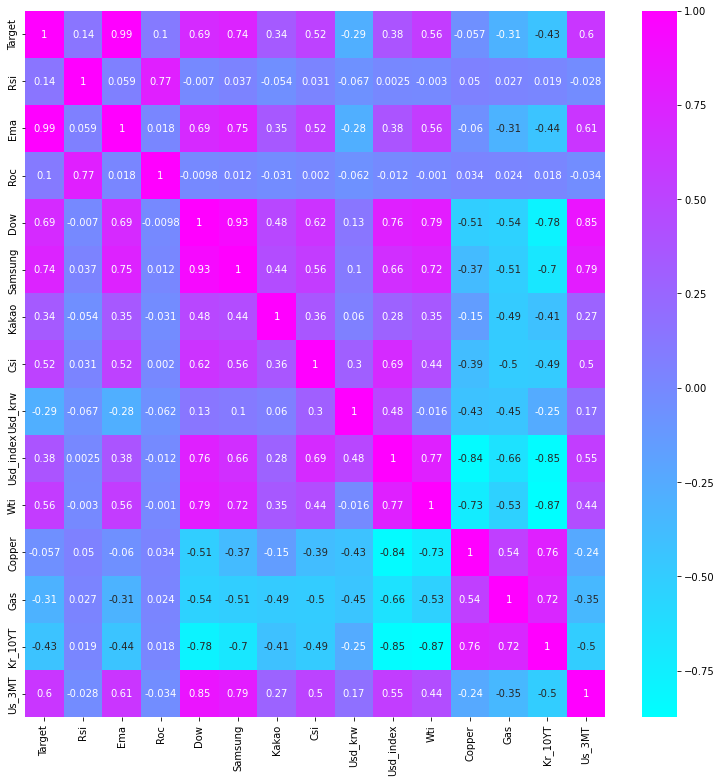

In [387]:
plt.figure(figsize=(13,13))
sns.heatmap(kospi_train_merged.corr(),annot=True, cmap='cool')

## Feature Engineering

In [388]:
# kospi_test merge
kospi_test_merged = pd.merge(kospi_test['Close'],kospi_test.Rsi,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kospi_test.Ema,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kospi_test.Roc,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,dow_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,samsung_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kakao_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,csi_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_krw_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_index_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,wti_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,gas_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,copper_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kr_10YT_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,us_3MT_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged.columns = ['Target','Rsi','Ema','Roc', 'Dow', 'Samsung', 'Kakao', 'Csi', 'Usd_krw', 'Usd_index', 'Wti', 'Gas', 'Copper', 'Kr_10YT', 'Us_3MT']
kospi_test_merged = kospi_test_merged.fillna(kospi_test_merged.interpolate())
kospi_test_merged = kospi_test_merged.fillna(method='bfill')

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1915524427.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,kakao_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1915524427.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,usd_krw_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_7840/1915524427.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,wti_test.Close,left_inde

In [389]:
# test merge 확인
kospi_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-05-12 to 2020-09-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     100 non-null    float64
 1   Rsi        100 non-null    float64
 2   Ema        100 non-null    float64
 3   Roc        100 non-null    float64
 4   Dow        100 non-null    float64
 5   Samsung    100 non-null    int64  
 6   Kakao      100 non-null    int64  
 7   Csi        100 non-null    float64
 8   Usd_krw    100 non-null    float64
 9   Usd_index  100 non-null    float64
 10  Wti        100 non-null    float64
 11  Gas        100 non-null    float64
 12  Copper     100 non-null    float64
 13  Kr_10YT    100 non-null    float64
 14  Us_3MT     100 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 16.6 KB


In [397]:
kospi_train_merged

,Target,Rsi,Ema,Roc,Dow,Samsung,Kakao,Csi,Usd_krw,Usd_index,Wti,Copper,Gas,Kr_10YT,Us_3MT
Date,,,,,,,,,,,,,,,
2010-01-11,1698.64,48.164971,1694.145333,-0.119094,10663.99,15940.0,14451.0,3482.05,1120.50,77.160,40.58,3.4290,5.454,5.360,0.033
2010-01-12,1671.41,52.990608,1695.643556,0.474382,10627.26,16180.0,14551.0,3534.92,1120.75,77.120,40.34,3.3370,5.591,5.380,0.048
2010-01-13,1685.77,31.151660,1687.565704,-1.988483,10680.77,15940.0,14411.0,3421.14,1123.00,76.990,40.53,3.3880,5.733,5.330,0.056
2010-01-14,1701.80,45.860112,1686.967136,0.137812,10710.55,16540.0,14270.0,3469.05,1123.00,76.885,40.21,3.3760,5.588,5.350,0.053
2010-01-15,1711.78,58.292990,1691.911424,0.385782,10609.65,16840.0,15555.0,3482.74,1123.50,77.480,40.00,3.3550,5.691,5.350,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,1914.73,65.951628,1883.751190,2.103840,23475.82,49850.0,35526.0,3839.38,1233.55,100.528,71.21,2.4000,1.939,1.526,0.104
2020-04-23,1889.01,71.228544,1894.077460,3.104891,23515.26,49850.0,37232.0,3829.75,1233.04,100.535,71.23,2.4070,1.815,1.545,0.109
2020-04-24,1922.77,56.166157,1892.388307,-1.332964,23775.27,49350.0,36731.0,3796.97,1230.53,100.434,71.40,2.4245,1.746,1.551,0.122


In [390]:
trainX = kospi_train_merged.drop(columns=['Target'])
trainy = kospi_train_merged['Target']
testX = kospi_test_merged.drop(columns=['Target'])
testy = kospi_test_merged['Target']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(2543, 14) (2543,) (100, 14) (100,)


In [391]:
# Scale two ways
trainX_scaled_minmax = MinMaxScaler().fit_transform(trainX)
testX_scaled_minmax = MinMaxScaler().fit_transform(testX)

In [398]:
# kernels = ['rbf','poly']
# for kernel in kernels:
#     if kernel == 'poly':
#         params = {
#             'kernel' : [kernel],
#             'C' : [i for i in range(3,11)],
#             'degree' : [i for i in range(1,5)],
#             'gamma' : [i*0.01 for i in range(21,61)]
#     }
#     else:
#         params = {
#             'kernel' : [kernel],
#             'C' : [i for i in range(1,11)],
#             'epsilon' : [i*0.1 for i in range(1,11)]
#         }
#     svr = SVR()
#     grid = GridSearchCV(svr, param_grid=params,refit=True,scoring='r2')
#     grid.fit(trainX_scaled_minmax,trainy)
#     print(f'best_param of {kernel}:', grid.best_params_)
#     print(f'best_score of {kernel}:', grid.best_score_)

In [407]:
def check(trainx, trainy, testx, testy, k, c, g, d):
    model = SVR(kernel=k, C=c, gamma=g, degree=d).fit(trainx,trainy)
    pred = model.predict(testx)
    return r2_score(testy,pred)

In [426]:
kernels = ['poly','rbf','sigmoid']
for kernel in kernels:
    r2_l = []
    for i in range(1,11):
        for o in range(1,11):
            for p in range(21,44):
                r2_l.append([check(trainX_scaled_minmax,trainy,testX_scaled_minmax,testy, kernel , i, p*0.01, o),i,p,o])
    print(f'Best case of {kernel} : {max(r2_l)}')

In [424]:
model = LinearRegression()
model3 = SVR(kernel='poly', C=1, gamma=0.26, degree= 3)
model5 = SVR(kernel='rbf',C=6,gamma= 0.39, epsilon=0.6,degree=10)
model7 = SVR(kernel='sigmoid',C=15,gamma= 0.14, epsilon=0.7,degree=7)
model.fit(trainX_scaled_minmax,trainy)
model3.fit(trainX_scaled_minmax,trainy)
model5.fit(trainX_scaled_minmax,trainy)
model7.fit(trainX_scaled_minmax,trainy)
pred = model.predict(testX_scaled_minmax)
pred3 = model3.predict(testX_scaled_minmax)
pred5 = model5.predict(testX_scaled_minmax)
pred7 = model7.predict(testX_scaled_minmax)
print('-----------------------------------------------------------')
print(f'Linear_minmax_scaled(MSE) : + {mean_squared_error(testy,pred)}')
print(f'Linear_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred)}')
print(f'Linear_minmax_scaled(R2) : + {r2_score(testy,pred)}')
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred3)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred3)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred3)}')
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred5)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred5)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred5)}')
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred7)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred7)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred7)}')

-----------------------------------------------------------
Linear_minmax_scaled(MSE) : + 26657.70272247788
Linear_minmax_scaled(MAE) : + 134.99824586110822
Linear_minmax_scaled(R2) : + -0.3330368474478582
-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 11764.368431203278
SVR_minmax_scaled(MAE) : + 99.30114672940692
SVR_minmax_scaled(R2) : + 0.4117146263874075
-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 12837.189650113894
SVR_minmax_scaled(MAE) : + 95.03280539418927
SVR_minmax_scaled(R2) : + 0.3580674599222379
-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 17296.694438291506
SVR_minmax_scaled(MAE) : + 120.60762038065528
SVR_minmax_scaled(R2) : + 0.1350668410805277


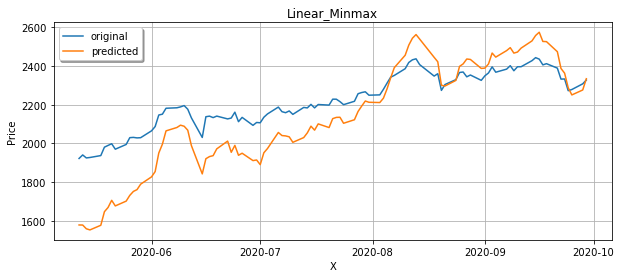

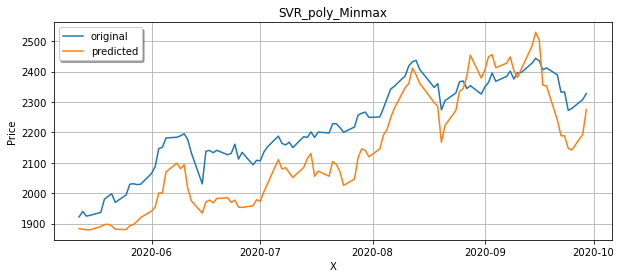

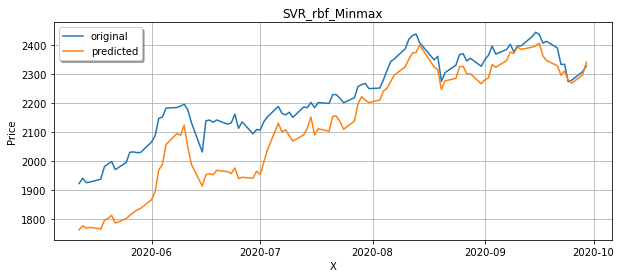

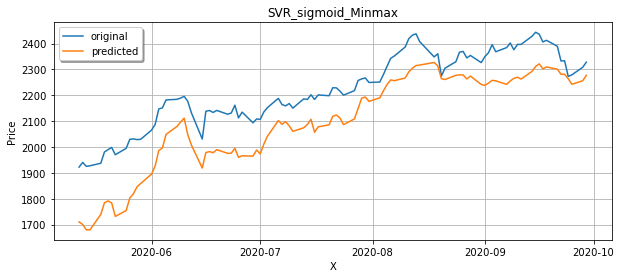

In [425]:
x_ax = kospi_test_merged.index
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred, label="predicted")
plt.title("Linear_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred3, label="predicted")
plt.title("SVR_poly_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred5, label="predicted")
plt.title("SVR_rbf_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred7, label="predicted")
plt.title("SVR_sigmoid_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()